## Implementation

# Data Understanding



Import Libraries
 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


Reading data 

In [ ]:
data = pd.read_csv("Data.csv",nrows=96)
data

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score,Top_1,Top_2,Top_3
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,2.0,4.0,5.0,...,7.0,7.0,7.0,6.0,7.0,5.0,Green,10,7,13
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,8.0,7.0,8.0,6.0,9.0,Blue,6,7,13
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,5.0,7.0,7.0,9.0,6.0,7.0,Green,1,5,7
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,7.0,7.0,8.0,7.5,6.5,9.0,Blue,19,16,13
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,7.0,6.0,8.0,NaN,NaN,Green,7,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,4.0,1.0,...,2.0,1.0,7.0,6.0,8.0,7.0,Gold,10,4,7
92,93,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,4.0,1.0,...,2.0,1.0,7.0,6.0,8.0,7.0,Green,10,4,7
93,94,Khaled Khatteb,Male,Business,Software developer,23,3.0,3.0,4.0,2.0,...,7.0,6.0,8.0,9.0,6.0,7.0,Gold,10,17,5
94,95,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,1.0,3.0,1.0,...,5.0,6.0,5.0,8.0,4.0,4.0,Gold,10,17,7


In [ ]:
data.dtypes

Id                     int64
Name                  object
Gender                object
Field                 object
Occupation            object
Age                    int64
Openness             float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Interface_1          float64
Interface_2          float64
Interface_3          float64
Interface_4          float64
Interface_5          float64
Interface_6          float64
Interface_7          float64
Interface_8          float64
Interface_9          float64
Interface_10         float64
Interface_11         float64
Interface_12         float64
Interface_13         float64
Interface_14         float64
Interface_15         float64
Interface_16         float64
Interface_17         float64
Extra_interface_1    float64
Extra_interface_2    float64
Test_Score            object
Top_1                  int64
Top_2                  int64
Top_3                  int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 96 non-null     int64  
 1   Name               96 non-null     object 
 2   Gender             96 non-null     object 
 3   Field              96 non-null     object 
 4   Occupation         96 non-null     object 
 5   Age                96 non-null     int64  
 6   Openness           96 non-null     float64
 7   Extraversion       96 non-null     float64
 8   Agreeableness      96 non-null     float64
 9   Conscientiousness  96 non-null     float64
 10  Neuroticism        96 non-null     float64
 11  Interface_1        96 non-null     float64
 12  Interface_2        96 non-null     float64
 13  Interface_3        96 non-null     float64
 14  Interface_4        96 non-null     float64
 15  Interface_5        96 non-null     float64
 16  Interface_6        96 non-nu

In [ ]:
# data['Interface_9'] = data['Interface_9'].astype('float64')


In [ ]:

# data['Neuroticism'] = data['Neuroticism'].astype('float64')

In [ ]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.000000
Name                 0.000000
Gender               0.000000
Field                0.000000
Occupation           0.000000
Age                  0.000000
Openness             0.000000
Extraversion         0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Neuroticism          0.000000
Interface_1          0.000000
Interface_2          0.000000
Interface_3          0.000000
Interface_4          0.000000
Interface_5          0.000000
Interface_6          0.000000
Interface_7          0.000000
Interface_8          0.000000
Interface_9          0.000000
Interface_10         0.000000
Interface_11         0.000000
Interface_12         0.000000
Interface_13         0.000000
Interface_14         0.000000
Interface_15         0.000000
Interface_16         0.000000
Interface_17         0.000000
Extra_interface_1    7.291667
Extra_interface_2    7.291667
Test_Score           0.000000
Top_1                0.000000
Top_2                0.000000
Top_3     

In [ ]:
data['Extra_interface_1'].fillna(value=data['Extra_interface_1'].mean(), inplace=True)

In [ ]:
data['Extra_interface_2'].fillna(value=data['Extra_interface_2'].mean(), inplace=True)


In [ ]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.0
Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Extra_interface_1    0.0
Extra_interface_2    0.0
Test_Score           0.0
Top_1                0.0
Top_2                0.0
Top_3                0.0
dtype: float64

In [ ]:
data['Test_Score'] .unique()

array(['Green', 'Blue', 'Gold', 'Orange'], dtype=object)

In [ ]:
data['Test_Score'] = pd.factorize(data['Test_Score'])[0]
data['Test_Score'] .unique()

array([0, 1, 2, 3])

In [ ]:
data

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score,Top_1,Top_2,Top_3
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,2.0,4.0,5.0,...,7.0,7.0,7.0,6.0,7.000000,5.000000,0,10,7,13
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,8.0,7.0,8.0,6.000000,9.000000,1,6,7,13
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,5.0,7.0,7.0,9.0,6.000000,7.000000,0,1,5,7
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,7.0,7.0,8.0,7.5,6.500000,9.000000,1,19,16,13
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,7.0,6.0,8.0,6.152809,6.114607,0,7,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,4.0,1.0,...,2.0,1.0,7.0,6.0,8.000000,7.000000,2,10,4,7
92,93,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,4.0,1.0,...,2.0,1.0,7.0,6.0,8.000000,7.000000,0,10,4,7
93,94,Khaled Khatteb,Male,Business,Software developer,23,3.0,3.0,4.0,2.0,...,7.0,6.0,8.0,9.0,6.000000,7.000000,2,10,17,5
94,95,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,1.0,3.0,1.0,...,5.0,6.0,5.0,8.0,4.000000,4.000000,2,10,17,7


In [ ]:
data.describe()


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,...,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score,Top_1,Top_2,Top_3
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,48.500000,22.270833,4.036458,3.239583,3.489583,2.609375,3.338542,6.822917,6.033333,5.993750,...,6.510417,6.479167,7.083333,7.961458,6.152809,6.114607,1.593750,9.708333,10.739583,10.604167
std,27.856777,6.084457,0.840566,1.256518,0.885495,1.433074,1.257598,1.707536,1.952416,1.983236,...,2.284938,2.331610,1.736098,1.778667,2.070296,2.057773,1.062055,4.497758,5.388574,5.232448
min,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.800000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,24.750000,20.750000,3.000000,2.000000,3.000000,1.000000,2.375000,6.000000,5.000000,5.000000,...,5.000000,5.000000,6.000000,7.000000,5.000000,5.000000,1.000000,7.000000,7.000000,7.000000
50%,48.500000,21.000000,4.000000,3.000000,3.000000,2.500000,3.000000,7.000000,6.000000,6.000000,...,7.000000,7.000000,7.000000,8.000000,6.152809,6.114607,2.000000,10.000000,10.500000,10.500000
75%,72.250000,21.250000,5.000000,4.000000,4.000000,4.000000,4.000000,8.000000,7.000000,7.000000,...,8.000000,8.000000,8.000000,9.000000,8.000000,7.050000,2.000000,13.000000,16.000000,16.000000
max,96.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,19.000000,19.000000,19.000000


# Statistical analysis

In [ ]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap='Pastel1')

,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score,Top_1,Top_2,Top_3
Id,1.000000,-0.050000,0.050000,-0.160000,0.000000,-0.230000,0.040000,-0.080000,-0.140000,-0.120000,0.040000,-0.160000,-0.080000,-0.010000,0.070000,-0.020000,0.210000,-0.140000,-0.040000,0.040000,-0.220000,-0.220000,-0.120000,0.070000,0.020000,0.010000,0.020000,0.130000,0.010000,-0.120000
Age,-0.050000,1.000000,-0.010000,0.220000,0.210000,0.220000,0.030000,0.090000,0.080000,0.050000,0.170000,0.070000,0.130000,-0.020000,0.050000,0.060000,-0.100000,0.000000,0.030000,0.040000,0.180000,0.190000,0.080000,-0.060000,0.180000,0.060000,-0.060000,0.000000,0.060000,0.020000
Openness,0.050000,-0.010000,1.000000,0.320000,0.090000,0.250000,0.030000,0.070000,0.050000,0.180000,0.120000,0.200000,0.100000,0.050000,0.100000,-0.020000,0.140000,0.070000,0.110000,0.230000,-0.000000,-0.080000,0.150000,0.120000,0.090000,-0.050000,-0.020000,0.110000,-0.220000,-0.050000
Extraversion,-0.160000,0.220000,0.320000,1.000000,0.120000,0.100000,-0.050000,-0.020000,0.180000,0.100000,0.240000,0.150000,0.180000,0.090000,0.100000,0.110000,0.020000,0.060000,0.060000,0.030000,0.100000,0.030000,0.190000,-0.070000,0.190000,-0.070000,0.060000,0.010000,-0.070000,0.030000
Agreeableness,0.000000,0.210000,0.090000,0.120000,1.000000,0.020000,0.140000,0.030000,0.060000,0.060000,0.060000,0.120000,-0.040000,-0.100000,-0.050000,0.080000,-0.180000,-0.040000,0.040000,-0.080000,-0.020000,0.000000,0.050000,-0.100000,0.090000,-0.020000,-0.120000,0.000000,-0.160000,-0.070000
Conscientiousness,-0.230000,0.220000,0.250000,0.100000,0.020000,1.000000,0.040000,0.140000,0.190000,0.080000,0.030000,0.110000,0.170000,0.060000,0.080000,0.190000,0.030000,0.140000,0.010000,0.160000,0.190000,0.120000,0.100000,0.120000,0.020000,0.010000,-0.030000,0.030000,-0.010000,0.040000
Neuroticism,0.040000,0.030000,0.030000,-0.050000,0.140000,0.040000,1.000000,0.260000,0.140000,0.270000,0.170000,0.160000,0.050000,0.020000,0.000000,0.070000,0.250000,0.110000,0.190000,0.120000,-0.080000,-0.050000,-0.010000,-0.010000,0.100000,0.070000,0.060000,-0.270000,-0.230000,0.000000
Interface_1,-0.080000,0.090000,0.070000,-0.020000,0.030000,0.140000,0.260000,1.000000,0.680000,0.760000,0.400000,0.560000,0.230000,0.170000,0.130000,0.170000,0.250000,0.520000,0.410000,0.240000,0.180000,0.300000,0.260000,0.410000,0.280000,0.240000,-0.040000,-0.330000,-0.320000,-0.290000
Interface_2,-0.140000,0.080000,0.050000,0.180000,0.060000,0.190000,0.140000,0.680000,1.000000,0.720000,0.400000,0.480000,0.310000,0.330000,0.260000,0.310000,0.240000,0.350000,0.330000,0.220000,0.250000,0.330000,0.260000,0.310000,0.360000,0.180000,-0.010000,-0.410000,-0.360000,-0.190000
Interface_3,-0.120000,0.050000,0.180000,0.100000,0.060000,0.080000,0.270000,0.760000,0.720000,1.000000,0.270000,0.410000,0.310000,0.260000,0.140000,0.150000,0.290000,0.420000,0.370000,0.200000,0.150000,0.260000,0.240000,0.340000,0.300000,0.160000,0.010000,-0.290000,-0.290000,-0.290000


In [ ]:
data.value_counts('Test_Score')


Test_Score
2    30
1    24
3    23
0    19
dtype: int64

In [ ]:
data.value_counts('Age')


Age
21    48
19    10
20    10
22     8
23     5
18     3
24     3
15     1
25     1
26     1
27     1
37     1
38     1
46     1
52     1
57     1
dtype: int64

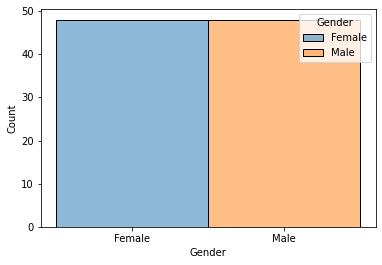

In [ ]:
sns.histplot(x='Gender', hue='Gender', data=data)


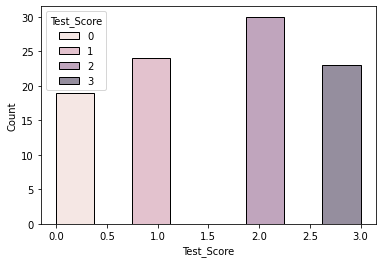

In [ ]:
sns.histplot(x='Test_Score', hue='Test_Score', data=data)


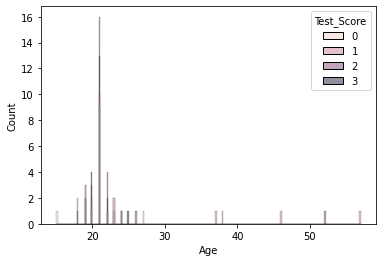

In [ ]:

sns.histplot(x='Age', hue='Test_Score', data=data)


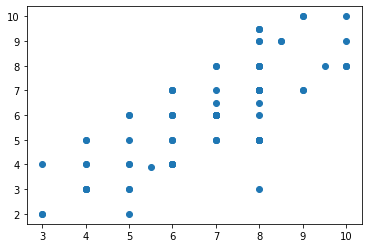

In [ ]:


plt.scatter(data.Interface_1, data.Interface_3)
plt.show()

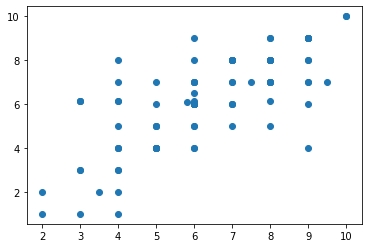

In [ ]:

plt.scatter(data.Interface_4, data.Extra_interface_1)
plt.show()

Green

In [ ]:
data[data["Test_Score"] == 0].mean()

<ipython-input-23-e4ec7da1251b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Test_Score"] == 0].mean()


Id                   50.052632
Age                  21.052632
Openness              4.000000
Extraversion          2.605263
Agreeableness         3.421053
Conscientiousness     3.026316
Neuroticism           3.105263
Interface_1           6.868421
Interface_2           6.168421
Interface_3           5.757895
Interface_4           6.094737
Interface_5           6.736842
Interface_6           5.784211
Interface_7           7.105263
Interface_8           5.310526
Interface_9           5.421053
Interface_10          8.868421
Interface_11          6.605263
Interface_12          5.405263
Interface_13          7.463158
Interface_14          5.736842
Interface_15          5.789474
Interface_16          6.500000
Interface_17          7.594737
Extra_interface_1     5.750148
Extra_interface_2     6.463927
Test_Score            0.000000
Top_1                 7.947368
Top_2                 9.578947
Top_3                 9.894737
dtype: float64

Blue

In [ ]:
data[data["Test_Score"] == 1].mean()

<ipython-input-24-031202609dce>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Test_Score"] == 1].mean()


Id                   42.750000
Age                  24.541667
Openness              4.083333
Extraversion          3.666667
Agreeableness         3.750000
Conscientiousness     2.291667
Neuroticism           3.333333
Interface_1           6.979167
Interface_2           5.895833
Interface_3           6.187500
Interface_4           6.291667
Interface_5           7.020833
Interface_6           5.625000
Interface_7           7.020833
Interface_8           4.270833
Interface_9           3.958333
Interface_10          8.000000
Interface_11          6.875000
Interface_12          6.229167
Interface_13          7.625000
Interface_14          6.375000
Interface_15          6.562500
Interface_16          7.250000
Interface_17          7.958333
Extra_interface_1     6.283567
Extra_interface_2     5.676217
Test_Score            1.000000
Top_1                10.291667
Top_2                11.041667
Top_3                11.000000
dtype: float64

Gold

In [ ]:
data[data["Test_Score"] == 2].mean()

<ipython-input-25-475e97455e02>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Test_Score"] == 2].mean()


Id                   52.466667
Age                  22.166667
Openness              4.083333
Extraversion          3.500000
Agreeableness         3.550000
Conscientiousness     2.483333
Neuroticism           3.533333
Interface_1           6.716667
Interface_2           6.033333
Interface_3           6.050000
Interface_4           6.683333
Interface_5           6.516667
Interface_6           5.333333
Interface_7           7.133333
Interface_8           4.550000
Interface_9           4.583333
Interface_10          8.650000
Interface_11          6.610000
Interface_12          6.066667
Interface_13          7.590000
Interface_14          6.850000
Interface_15          6.750000
Interface_16          7.500000
Interface_17          7.983333
Extra_interface_1     6.710187
Extra_interface_2     6.274307
Test_Score            2.000000
Top_1                 9.900000
Top_2                11.633333
Top_3                11.033333
dtype: float64

Orange

In [ ]:
data[data["Test_Score"] == 3].mean()

<ipython-input-26-79c4bce6fc17>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Test_Score"] == 3].mean()


Id                   48.043478
Age                  21.043478
Openness              3.956522
Extraversion          2.978261
Agreeableness         3.195652
Conscientiousness     2.760870
Neuroticism           3.282609
Interface_1           6.760870
Interface_2           6.065217
Interface_3           5.913043
Interface_4           5.913043
Interface_5           6.869565
Interface_6           5.826087
Interface_7           7.021739
Interface_8           5.195652
Interface_9           4.934783
Interface_10          8.456522
Interface_11          7.239130
Interface_12          5.391304
Interface_13          6.978261
Interface_14          6.847826
Interface_15          6.608696
Interface_16          6.847826
Interface_17          8.239130
Extra_interface_1     5.621983
Extra_interface_2     6.075183
Test_Score            3.000000
Top_1                10.304348
Top_2                10.217391
Top_3                10.217391
dtype: float64

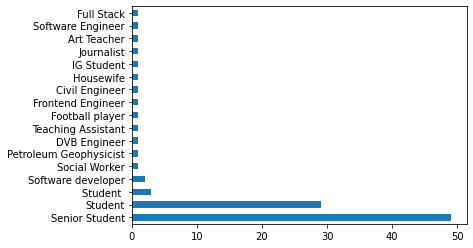

In [ ]:
data.Occupation.value_counts().plot.barh()
plt.show()

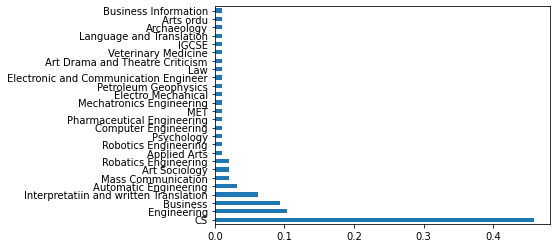

In [ ]:
data.Field.value_counts(normalize= True).plot.barh()
plt.show()

Plot for all interfaces to see ratings vs  counts

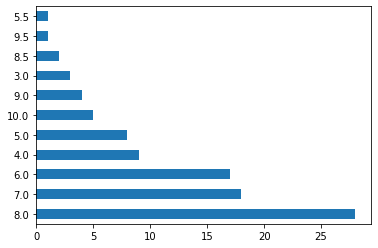

In [ ]:
data.Interface_1.value_counts().plot.barh()
plt.show()

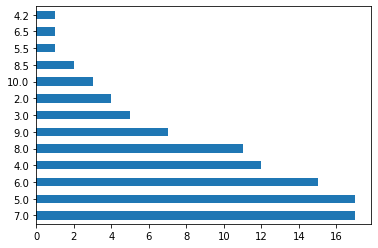

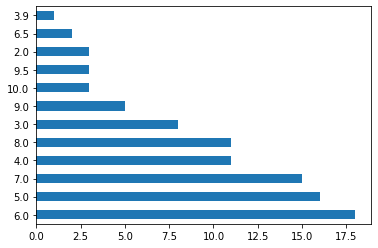

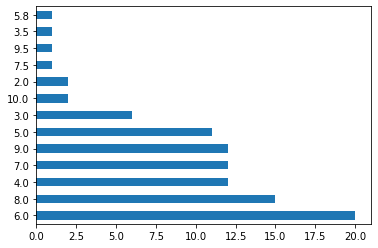

In [ ]:
data.Interface_2.value_counts().plot.barh()
plt.show()
data.Interface_3.value_counts().plot.barh()
plt.show()
data.Interface_4.value_counts().plot.barh()
plt.show()

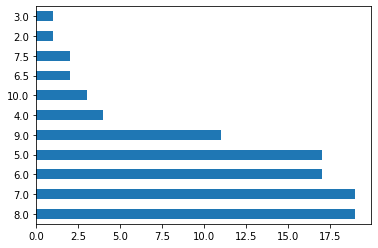

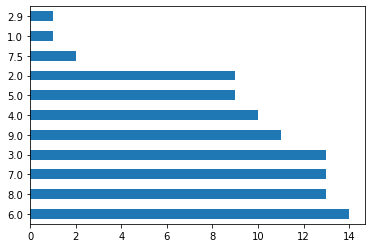

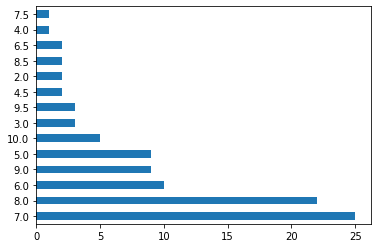

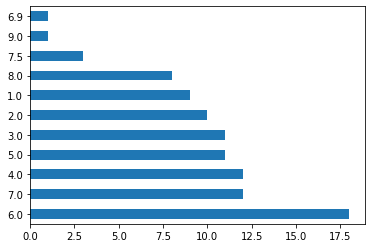

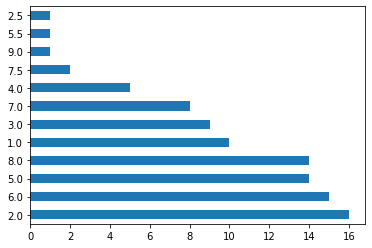

In [ ]:
data.Interface_5.value_counts().plot.barh()
plt.show()
data.Interface_6.value_counts().plot.barh()
plt.show()
data.Interface_7.value_counts().plot.barh()
plt.show()
data.Interface_8.value_counts().plot.barh()
plt.show()
data.Interface_9.value_counts().plot.barh()
plt.show()


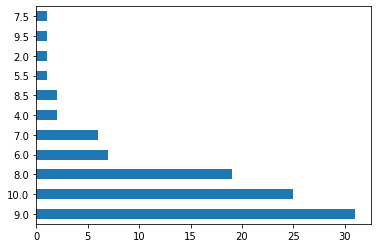

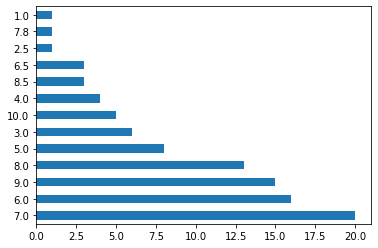

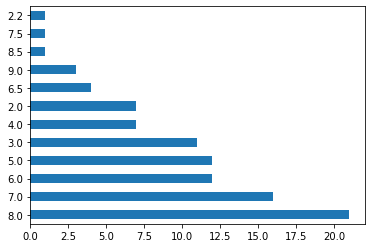

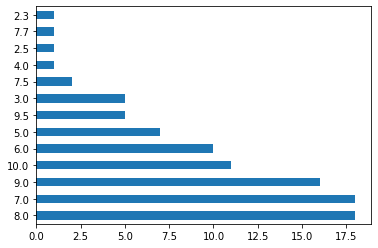

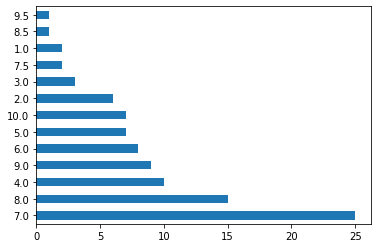

In [ ]:
data.Interface_10.value_counts().plot.barh()
plt.show()
data.Interface_11.value_counts().plot.barh()
plt.show()
data.Interface_12.value_counts().plot.barh()
plt.show()
data.Interface_13.value_counts().plot.barh()
plt.show()
data.Interface_14.value_counts().plot.barh()
plt.show()


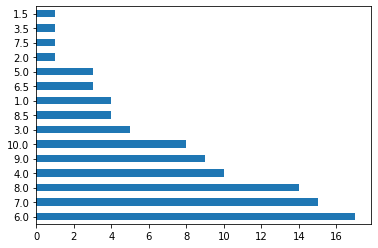

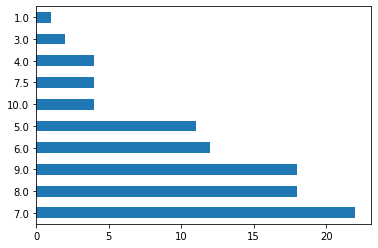

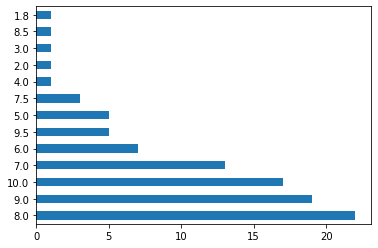

In [ ]:
data.Interface_15.value_counts().plot.barh()
plt.show()
data.Interface_16.value_counts().plot.barh()
plt.show()
data.Interface_17.value_counts().plot.barh()
plt.show()



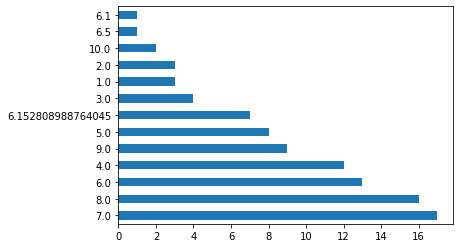

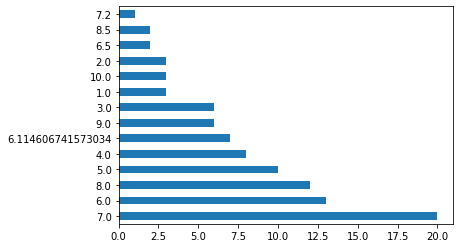

In [ ]:
data.Extra_interface_1.value_counts().plot.barh()
plt.show()
data.Extra_interface_2.value_counts().plot.barh()
plt.show()

Top 3 ratings columns

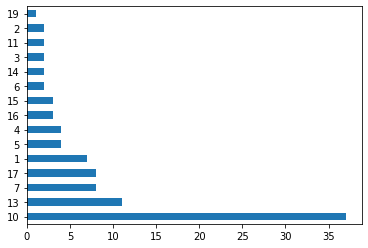

In [ ]:
data.Top_1.value_counts().plot.barh()
plt.show()


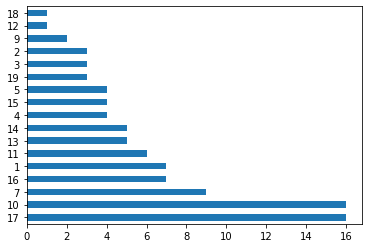

In [ ]:
data.Top_2.value_counts().plot.barh()
plt.show()

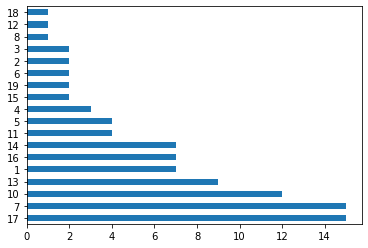

In [ ]:
data.Top_3.value_counts().plot.barh()
plt.show()

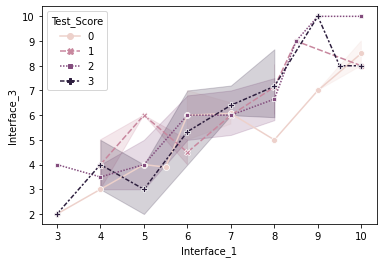

In [ ]:
sns.lineplot(x = "Interface_1",y = "Interface_3",data = data,hue = "Test_Score",style = "Test_Score",markers=True)

In [ ]:
new = data.groupby("Top_1")["Test_Score"].count()
new

Top_1
1      7
2      2
3      2
4      4
5      4
6      2
7      8
10    37
11     2
13    11
14     2
15     3
16     3
17     8
19     1
Name: Test_Score, dtype: int64

In [ ]:
new = data.groupby("Test_Score")["Top_2"].count()
new

Test_Score
0    19
1    24
2    30
3    23
Name: Top_2, dtype: int64

In [ ]:
data['Extraversion']

0     2.0
1     5.0
2     4.0
3     3.0
4     2.0
     ... 
91    4.0
92    4.0
93    3.0
94    1.0
95    1.0
Name: Extraversion, Length: 96, dtype: float64

In [ ]:
introversion = data.loc[data.Extraversion < 3, 'Extraversion']
introversion.count()


29

In [ ]:
Extraversion_persons = data.loc[data.Extraversion > 3, 'Extraversion'] 
Extraversion_persons.count()


44